In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, auc
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC

def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    data['isKilled'] = number.fit_transform(data.isKilled)
    return data

features = pd.read_csv('py_files/training_data.csv',encoding= 'unicode_escape')
features=convert(features)
# Labels are the values we want to predict
labels = np.array(features['isKilled'])
features= features.drop('isKilled', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [17]:
##Validation set create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(147953, 14) (147953,)
(443860, 14) (443860,)


In [20]:
from sklearn.svm import LinearSVC
#Create a svm Classifier
clf = svm.LinearSVC(dual=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

/home/padmin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [19]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7981593295183166


In [23]:
test = pd.read_csv('py_files/testing_data.csv',encoding= 'unicode_escape')

#Convert string to float
test=convert(test)

# ## Labels are the values we want to predict
np_test_labels = np.array(test['isKilled'])

# # Remove the labels from the features
# # axis 1 refers to the columns
test= test.drop('isKilled', axis = 1)

# # Saving feature names for later use
feature_list = list(test.columns)

# # Convert to numpy array
np_test = np.array(test)
y_pred_test = clf.predict(np_test)
#print("Predicted labels::", y_pred_test)
print(accuracy_score(np_test_labels, y_pred_test))
confusion = confusion_matrix(np_test_labels, y_pred_test)
print("Confusion_matrix:\n",confusion)

0.5399482800420224
Confusion_matrix:
 [[41850 51132]
 [17182 38328]]


In [7]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.25)

#Create a svm Classifier
clf = svm.LinearSVC(dual=False) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.798021898796918


In [ ]:
##Validation set create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

from sklearn.svm import LinearSVC
#Create a svm Classifier
clf = svm.LinearSVC(C=100,max_iter=) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

(147953, 14) (147953,)
(443860, 14) (443860,)


In [24]:
##Validation set create training and testing vars
size = [0.5]
for i in size:
    validation_accuracy  = 0.0
    test_accuracy = 0.0
    for j in range(1,21):
        X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=i)
        C = [0.01,0.1,1.0,10,100]
        for l in C:
            clf_grid = svm.LinearSVC(C=l,dual=False)
            clf_grid.fit(X_train, y_train)
            y_pred = clf_grid.predict(X_test)
            y_pred_test = clf_grid.predict(np_test)
            print("For sample:",j, " for C:",l)
            print("***Validation accuracy***")
            print(accuracy_score(y_test, y_pred))
            print("***Test accuracy***")
            print(accuracy_score(np_test_labels, y_pred_test))

For sample: 1  for C: 0.01
***Validation accuracy***
0.7974363566931502
***Test accuracy***
0.6383172157422622
For sample: 1  for C: 0.1
***Validation accuracy***
0.7974363566931502
***Test accuracy***
0.6383172157422622
For sample: 1  for C: 1.0
***Validation accuracy***
0.797564775419304
***Test accuracy***
0.6387953559787732
For sample: 1  for C: 10
***Validation accuracy***
0.7974363566931502
***Test accuracy***
0.6383172157422622
For sample: 1  for C: 100
***Validation accuracy***
0.7974363566931502
***Test accuracy***
0.6383172157422622
For sample: 2  for C: 0.01
***Validation accuracy***
0.7970815154761463
***Test accuracy***
0.6384855749804703
For sample: 2  for C: 0.1
***Validation accuracy***
0.7970815154761463
***Test accuracy***
0.6384855749804703
For sample: 2  for C: 1.0
***Validation accuracy***
0.7970815154761463
***Test accuracy***
0.6384855749804703
For sample: 2  for C: 10
***Validation accuracy***
0.7970815154761463
***Test accuracy***
0.6384855749804703
For sample:

In [3]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.25, random_state=42)
pipe = make_pipeline(StandardScaler(), svm.SVC(kernel='poly'))
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

NameError: name 'Pipeline' is not defined

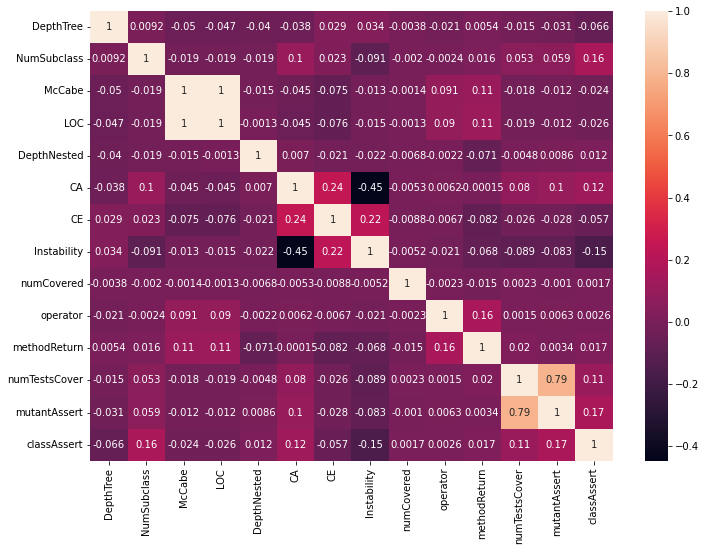

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt

def convert(data):
    number = preprocessing.LabelEncoder()
    data['operator'] = number.fit_transform(data.operator)
    data['methodReturn'] = number.fit_transform(data.methodReturn)
    return data

features = pd.read_csv('py_files/training_data.csv',encoding= 'unicode_escape')
features=convert(features)

corr = features.corr()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sn.heatmap(ax=ax, data=corr,annot=True)
plt.savefig('corr_matrix.png')